# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from pandas_datareader import wb

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We begin with importing the data for CO2 emission for high income, middle income and low income countries.

In [10]:
wb_co2 = wb.download(indicator='EN.ATM.CO2E.KT', country=['HIC','MIC','LIC'], start=1998, end=2018)
wb_co2 = wb_co2.rename(columns = {'EN.ATM.CO2E.KT':'CO2 emissions'})
wb_co2 = wb_co2.reset_index() 
wb_co2.sample(5)

C:\Users\laura\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: HIC, LIC, MIC
  warnings.warn(


,country,year,CO2 emissions
26,Low income,2013,1.567876e+05
54,Middle income,2006,1.441825e+07
46,Middle income,2014,2.000640e+07
28,Low income,2011,1.854011e+05
6,High income,2012,1.263566e+07


In [12]:
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD.ZG', country=['HIC','MIC','LIC'], start=1998, end=2018)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD.ZG':'GDP_GROWTH'})
wb_gdp = wb_gdp.reset_index() 
wb_gdp.sample(5)

C:\Users\laura\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: HIC, LIC, MIC
  warnings.warn(


,country,year,GDP_GROWTH
35,Low income,2004,3.056601
14,High income,2004,2.697889
5,High income,2013,0.910056
45,Middle income,2015,3.254054
34,Low income,2005,3.549105


In [13]:
wb_gdp.info()
wb_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     63 non-null     object 
 1   year        63 non-null     object 
 2   GDP_GROWTH  63 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        63 non-null     object 
 1   year           63 non-null     object 
 2   CO2 emissions  63 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [14]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [14]:
wb = pd.merge(wb_gdp, wb_co2, how = 'outer', on = ['country','year']);
wb.head(5)

,country,year,GDP_GROWTH,CO2 emissions
0,High income,2018,1.870819,1.236637e+07
1,High income,2017,1.859085,1.232093e+07
2,High income,2016,1.240919,1.238826e+07
3,High income,2015,1.906891,1.249017e+07
4,High income,2014,1.543248,1.253364e+07


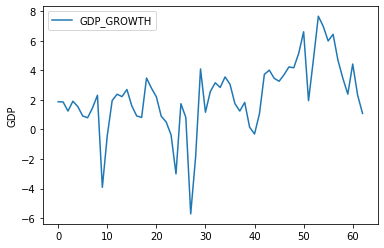

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Now we are just plotting directly from the pandas dataframe. Still using matplotlib under the hood.
wb_gdp.plot(ax=ax)

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('GDP');

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.